In [42]:
import json
import pandas as pd
from glob import glob
from tqdm import tqdm

In [35]:
annotations = glob('tracked_detections/vfnet_annotations/vfnet_all/**/*.json', recursive=True)

In [40]:
def open_annotation(filename):
    with open(filename, 'rb') as handle:
        annotation = json.load(handle)
    return annotation

def get_ape_ids(annotation):
    apes = []
    for frame in annotation:
        for d in frame['detections']:
            if(d['ape_id'] not in apes):
                apes.append(d['ape_id'])
    return apes

def measure_tracklets(ids, annotation):
    lengths = []
    for ape in ids:
        count=0
        for frame in annotation:
            is_ape = False
            for d in frame['detections']:
                if ape == d['ape_id']:
                    is_ape = True
            if(is_ape==True):
                count+=1
            else:
                continue
        lengths.append(count)
    return lengths

def get_all_tracklet_lens(annotations):
    lens = []
    for a in tqdm(annotations):
        annotation = open_annotation(a)
        annotation = annotation['annotations']
        ids = get_ape_ids(annotation)
        lengths = measure_tracklets(ids, annotation)
        lens.extend(lengths)
    return lens

In [41]:
lens = get_all_tracklet_lens(annotations)

100%|██████████| 19967/19967 [00:23<00:00, 850.78it/s] 


<AxesSubplot:ylabel='Density'>

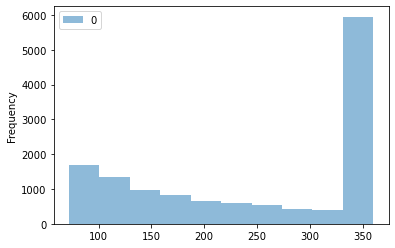

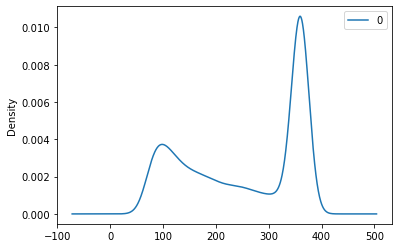

In [67]:
df = pd.DataFrame(lens)
df.plot.hist(bins=10, alpha=0.5)
df.plot.kde()
# print(f"Mean: {df[0].mean()}\nStd: {df[0].std()}\nMed: {df[0].median()}")